<a href="https://colab.research.google.com/github/WMFrts/regressao/blob/main/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center>REGRESSÃO</center></h2>
<p align="Justify">É uma técnica que permite quantificar e inferir a relação de uma variável dependente (variável de resposta, objetivo) com variáveis independentes (variáveis explicativas, previsoras). A análise da regressão pode ser usada como um método descritivo da análise de dados (por exemplo, o ajustamento de curvas).</p>
<hr size="1" width="100%" align="center" noshade>




<h3><center>1 REGRESSÃO LINEAR SIMPLES</center></h3>
<p align="Justify">Inclui somente duas variáveis: uma independente e outra dependente. 
A variável dependente é aquela que está sendo explicada, 
enquanto a variável independente é aquela que é utilizada 
para explicar a variação na variável dependente.</p>


In [3]:
#biblioteca plotly para visualização de gráficos dinâmicos:

!pip install plotly --upgrade


     |████████████████████████████████| 26.5 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [48]:

#plotly,seaborn e matplotlib para gerar e visualizar gráficos;
#pandas parar carregar o arquivo .csv;
#numpy para realizar os cálculos em Arrays Multidimensionais.

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


**1.1 BASE PLANO DE SAÚDE - EXPLORAÇÃO DE DADOS** 
<p align="Justify">Base de dados ilustrativa para estudo de regressão linear simples com 10 registros. Mostra na primeira coluna a idade; já na segunda, o custo.</p>

In [5]:

#Carregamento do arquivo

base_plano_saude = pd.read_csv('plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


**1.2 PERGUNTA SOBRE O CONTEXTO**
<p align="Justify">De acordo com os dados apresentados, quanto poderia custar o plano 
saúde dependendo da idade da pessoa?


Essa pergunta pode ser respondida por meio de um modelo de regressão
linear simples, pois há apenas duas variáveis: a dependente (custo) e a 
independente, previsora (idade)


In [6]:
#criação da variável x que armazenará o atributo previsor (idade)
#iloc[:,0] seleciona o conj. de registros de todas as linhas da coluna 0
#.values converte para o formato np array

x_plano_saude = base_plano_saude.iloc[:, 0].values 
x_plano_saude


array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [7]:
#mesmo procedimento para a variável y dependente (custo)
y_plano_saude = base_plano_saude.iloc[:, 1].values 
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

**1.3 COEFICIENTE DE CORRELAÇÃO**
<p align="Justify">O coeficiente de correlação de Pearson é um teste que mede a relação estatística entre duas variáveis contínuas. 

Apresenta um intervalo de valores de +1 a -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável.

In [8]:
# A correlação entre as duas variáveis é 0.93091958
# 93% do custo talvez seja explicado pela idade 

np.corrcoef(x_plano_saude, y_plano_saude)


array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [9]:
# Esta em forma de vetor, precisa mudar para matriz

x_plano_saude.shape

(10,)

In [10]:
# .reshape() para mudar para forma de matriz
# Então, poderá ser enviada para o algoritmo de regressão

x_plano_saude = x_plano_saude.reshape(-1,1)
x_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [11]:
# importação para o algoritmo
# função fit() para executar o treinamento

from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x_plano_saude, y_plano_saude)


LinearRegression()

In [12]:
# y = b0 + b1.x, equação que representa o modelo
# treinamento = encontrar b0 e b1 para cada atributo

# b0 = intercept (intersecção com o eixo y)
regressor_plano_saude.intercept_

-558.9490909090912

In [13]:
# b = coeficiente (inclinação da reta)
regressor_plano_saude.coef_

array([61.86787879])

In [14]:
# método predict para descobrir a associação 
# x_plano_saude está relacionado as idades

previsoes = regressor_plano_saude.predict(x_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [ ]:
# gráfico de dispersão para visualizar o resultado
grafico = px.scatter(x = x_plano_saude, y= y_plano_saude)
grafico.show()

In [15]:
# antes, x_plano_saude está em formato de matriz 

x_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [16]:
# para fazer o gráfico, precisa retornar para o formato de vetor
# para isso, utiliza a função .ravel do np

x_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [17]:
# Novamente,  o código para mostrar o gráfico
# Aqui, mostra apenas os pontos idade e custo

grafico = px.scatter(x = x_plano_saude.ravel(), y= y_plano_saude)
grafico.show()

In [18]:
# Agora, com as previsões do algoritmo
# acrescentam-se as previsões com a função .add_scatter

grafico = px.scatter(x = x_plano_saude.ravel(), y= y_plano_saude)
grafico.add_scatter(x = x_plano_saude.ravel(), y= previsoes, name = 'Regressão')
grafico.show()

In [19]:
# para saber a qualidade do algoritmo
regressor_plano_saude.score(x_plano_saude, y_plano_saude)

0.8666112727879174

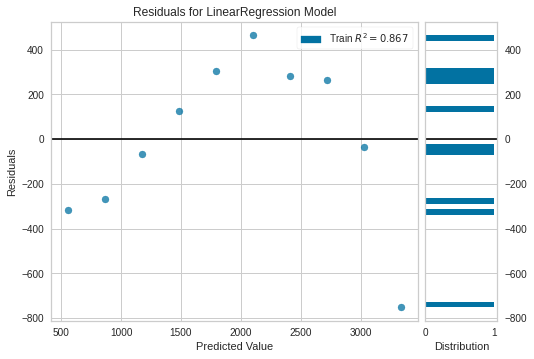

In [20]:
# para saber a distância dos valores reais em relção à regressão linear
# Train R² = 0.867 indica a qualidade do algoritmo

from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(x_plano_saude, y_plano_saude)
visualizador.poof()


**1.4 BASE PREÇO DAS CASAS - EXPLORAÇÃO DE DADOS**


In [21]:
base_casas = pd.read_csv('house_prices.csv')
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [22]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [23]:
# há valores faltantes? Quantos seriam?
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [24]:
# indicação das correlações 

base_casas.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


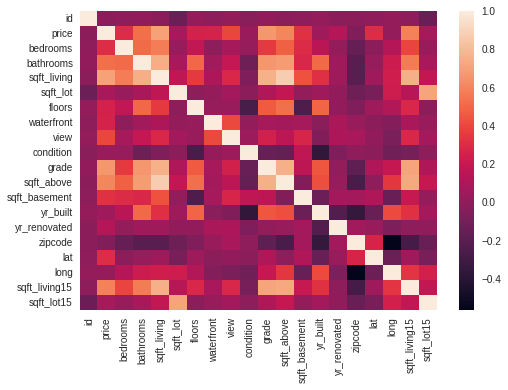

In [25]:
# com sns é possível visualizar melhor a correlação

sns.heatmap(base_casas.corr());

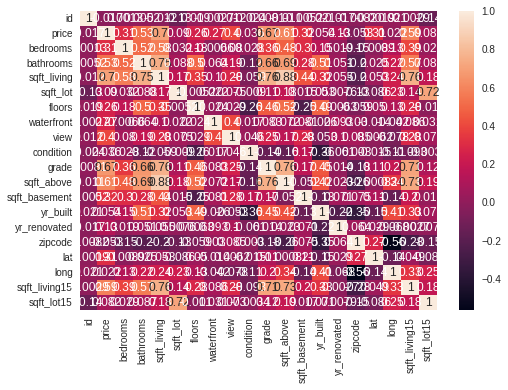

In [26]:
# Agora com os valores:
# "Ninguém quer fazer um gráfico ruim. Mas acontece" - Storytelling Com Dados

sns.heatmap(base_casas.corr(), annot= True);

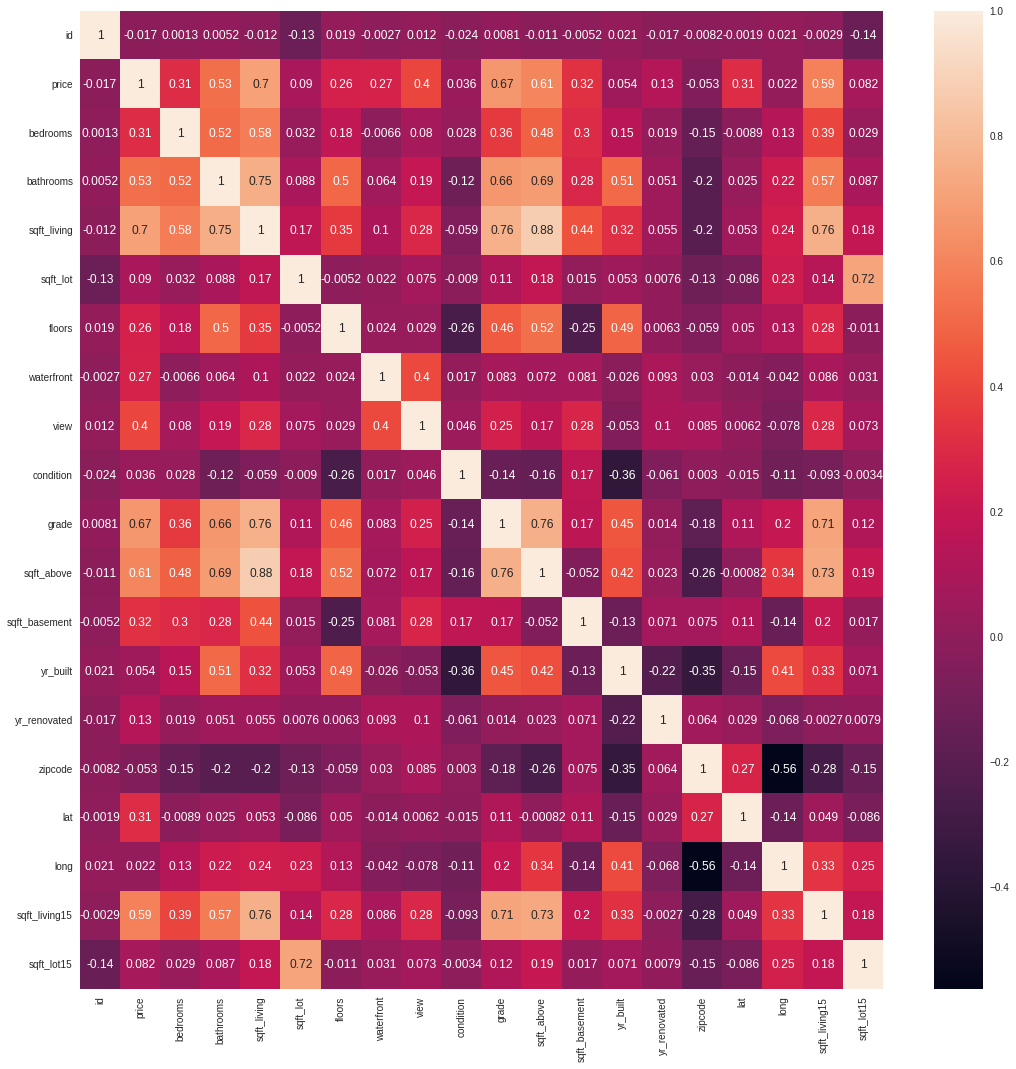

In [28]:
# aumentar o tamanho da figura:
# criação da variável e utilização do plt
# passagem do tamanho para figure

figura = plt.figure(figsize = (18, 18))
sns.heatmap(base_casas.corr(), annot= True);

**1.5 PERGUNTA SOBRE O CONTEXTO**
<p align="Justify">De acordo com os dados apresentados, baseado na metragem, qual seria o preço da casa?


A regressão linear simples também pode dar a resposta. Nesse caso, a variável x é o previsor, e a variável y está relacionada com o preço da casa

In [29]:
# metragem da casa

x_casas = base_casas.iloc[:, 5:6].values
x_casas

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [30]:
y_casas = base_casas.iloc[:,2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [38]:
# divisão da base de dados entre treinamento e teste
# "teste_size = 0.3" indica que 30% da base será para teste,
# logo, 70% da base será para treinar

import sklearn as sk

from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size = 0.3, random_state = 0)

In [39]:
# o treinamento irá acontecer com 15129 registros

x_casas_treinamento.shape, y_casas_treinamento.shape

((15129, 1), (15129,))

In [40]:
# o teste do algoritmo será feito com 6484 registros

x_casas_teste.shape, y_casas_teste.shape

((6484, 1), (6484,))

**CRIAÇÃO DO MODELO DE REGRESSÃO LINEAR**

In [41]:
from sklearn.linear_model import LinearRegression
regressor_simples_casa = LinearRegression()
regressor_simples_casa.fit(x_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [42]:
# b0

regressor_simples_casa.intercept_

-37893.59850106726

In [43]:
# b1

regressor_simples_casa.coef_

array([278.32860644])

In [44]:
# avaliação de desempenho na própria base de treinamento
# um bom desempenho, deve ser próximo de 1

regressor_simples_casa.score(x_casas_treinamento, y_casas_treinamento)

0.49453356717789776

In [45]:
# mais um baixo desempenho do algoritmo

regressor_simples_casa.score(x_casas_teste, y_casas_teste)

0.48889929019453027

In [46]:
#geração de previsões para o treinamento

previsoes = regressor_simples_casa.predict(x_casas_treinamento)
previsoes

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [47]:
# x_casas_treinamento.ravel() para transformar o vetor em matriz
# o gráfico retorna a previsão para cada registro da base de dados de treinamento

grafico = px.scatter(x = x_casas_treinamento.ravel(), y = previsoes)
grafico 

In [49]:
# Novo gráfico com todos os dados:
# no eixo y serão passados os dados reais: y = y_casas_treinamento
# Voltar na importação de bibliotecas para "import plotly.graph_objects as go"

grafico1 = px.scatter(x = x_casas_treinamento.ravel(), y = y_casas_treinamento)

grafico3 = go.Figure(data = grafico1.data)   #gera dois gráficos e faz a combinação 
grafico3

In [50]:
# concatenação com as previsões

grafico1 = px.scatter(x = x_casas_treinamento.ravel(), y = y_casas_treinamento)
grafico2 = px.line(x = x_casas_treinamento.ravel(), y = previsoes )   #gráfico de linha
grafico3 = go.Figure(data = grafico1.data + grafico2.data)   #concatenação
grafico3

In [51]:
grafico1 = px.scatter(x = x_casas_treinamento.ravel(), y = y_casas_treinamento)   #em azul
grafico2 = px.line(x = x_casas_treinamento.ravel(), y = previsoes )   #gráfico de linha
grafico2.data[0].line.color = 'black'   #previsões em preto
grafico3 = go.Figure(data = grafico1.data + grafico2.data)   #concatenação
grafico3

<h3><center>REGRESSÃO LINEAR MÚLTIPLA</center></h3>

<p align="Justify">É um modelo de análise que usamos quando modelamos a relação linear entre uma variável de desfecho contínua e múltiplas variáveis preditoras que podem ser contínuas ou categóricas.